In [48]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms

空间一阶偏导，各种方法的函数

In [257]:
# boundary_condition: 可选的有'periodic','neumann','dirichlet'，周期性边界条件和Dirichlet边界条件不够合理，暂不考虑？
# 于是，只需要考虑Neumann边界条件的话，就可以把求偏导的函数和加Neumann边界条件的函数（相当于加边界mask）分开来了

def phase_difference(snapshot_1:torch.tensor, snapshot_2:torch.tensor):

    # 注意这里是第一个减第二个
    difference = torch.remainder(snapshot_1-snapshot_2+torch.pi, 2*torch.pi) - torch.pi

    return difference



def phase_1st_order_spatial_partial_derivative_center_forward(snapshot:torch.tensor, delta_x:float):
    # 函数名：
    #   phase表示矩阵元是相位，差分是要考虑周期性的；
    #   1st_order表示一阶偏导；
    #   spatial表示对空间的偏导，输出是pI/px, pI/py两个矩阵；
    #   center表示在可能的地方进行中心差分
    #   forward表示在边界处进行前向差分
    # 输入：
    #   snapshot: 相位矩阵，行列对应神经元的空间位置，矩阵元对应该时刻该位置神经元活动的相位
    #   delta_x：空间差分间距，默认delta_x=delta_y
    # 输出:
    #   pI_px, pI_py: 对x,y的偏导的矩阵

    # (向左移一格 - 向右移一格)/(2*dleta_x)
    # 再进一步考虑相位的特殊差分
    pI_px_1 = phase_difference(torch.roll(snapshot, shifts=-1, dims=1), torch.roll(snapshot, shifts=1, dims=1)) / (2*delta_x)
    pI_px_1[:, 0] = phase_difference(snapshot[:, 1], snapshot[:, 0]) / delta_x
    pI_px_1[:, -1] = phase_difference(snapshot[:, -1], snapshot[:, -2]) / delta_x
    
    # (向上移一格 - 向下移一格)/(2*dleta_x), 注意这里y轴正方向是向下的, 与矩阵的列指标正方向一致
    pI_py_1 = phase_difference(torch.roll(snapshot, shifts=-1, dims=0), torch.roll(snapshot, shifts=1, dims=0)) / (2*delta_x)
    pI_py_1[0, :] = phase_difference(snapshot[1, :], snapshot[0, :]) / delta_x
    pI_py_1[-1, :] = phase_difference(snapshot[-1, :], snapshot[-2, :]) / delta_x

    return pI_px_1, pI_py_1



def phase_1st_order_spatial_partial_derivative_fivepoint_center_forward(snapshot_1, snapshot_2, delta_x):
    # 这是Pulin的方法
    
    # 函数名：
    #   phase表示矩阵元是相位，差分是要考虑周期性的；
    #   1st_order表示一阶偏导；
    #   spatial表示对空间的偏导，输出是pI/px, pI/py两个矩阵；
    #   five_point表示在可能的地方进行五点差分
    #   center表示在靠近边界的地方进行中心差分
    #   forward表示在边界处进行前向差分
    # 输入：
    #   snapshot_1, snapshot_2: 两个相邻时间步的相位矩阵，行列对应神经元的空间位置，矩阵元对应该时刻该位置神经元活动的相位
    #   delta_x：空间差分间距，默认delta_x=delta_y
    

    return



def phase_1st_order_spatial_partial_derivative_sobelconvolution(snapshot_1, snapshot_2, delta_x):
    # 这是paula的方法

    # 函数名：
    #   phase表示矩阵元是相位，差分是要考虑周期性的；
    #   1st_order表示一阶偏导；
    #   spatial表示对空间的偏导，输出是pI/px, pI/py两个矩阵；
    #   sobelconvolution表示用sobel核进行降噪中心差分
    # 输入：
    #   snapshot_1, snapshot_2: 两个相邻时间步的相位矩阵，行列对应神经元的空间位置，矩阵元对应该时刻该位置神经元活动的相位
    #   delta_x：空间差分间距，默认delta_x=delta_y
    

    return



def nonphase_1st_order_spatial_partial_derivative_center_forward(snapshot:torch.tensor, delta_x:float):
    # 函数名：
    #   nonphase表示矩阵元不是相位，差分不需要考虑周期性；
    #   1st_order表示一阶偏导；
    #   spatial表示对空间的偏导，输出是pI/px, pI/py两个矩阵；
    #   center表示在可能的地方进行中心差分
    #   forward表示在边界处进行前向差分
    # 输入：
    #   snapshot: 一个矩阵，行列对应神经元的空间位置，矩阵元对应该时刻该位置的值
    #   delta_x：空间差分间距，默认delta_x=delta_y
    # 输出:
    #   pI_px, pI_py: 对x,y的偏导的矩阵

    # (向左移一格 - 向右移一格)/(2*dleta_x)
    # 再进一步考虑相位的特殊差分
    pI_px_1 = (torch.roll(snapshot, shifts=-1, dims=1) - torch.roll(snapshot, shifts=1, dims=1)) / (2*delta_x)
    pI_px_1[:, 0] = (snapshot[:, 1] - snapshot[:, 0]) / delta_x
    pI_px_1[:, -1] = (snapshot[:, -1] - snapshot[:, -2]) / delta_x
    
    # (向上移一格 - 向下移一格)/(2*dleta_x), 注意这里y轴正方向是向下的, 与矩阵的列指标正方向一致
    pI_py_1 = (torch.roll(snapshot, shifts=-1, dims=0) - torch.roll(snapshot, shifts=1, dims=0)) / (2*delta_x)
    pI_py_1[0, :] = (snapshot[1, :] - snapshot[0, :]) / delta_x
    pI_py_1[-1, :] = (snapshot[-1, :] - snapshot[-2, :]) / delta_x

    return pI_px_1, pI_py_1




时间一阶偏导，各种方法的函数

In [258]:
def phase_1st_order_temporal_partial_derivative_forward(snapshot_1:torch.tensor, snapshot_2:torch.tensor, delta_t:float):
    # 函数名：
    #   phase表示矩阵元是相位，差分是要考虑周期性的；
    #   1st_order表示一阶偏导；
    #   temporal表示对时间的偏导，输出是pI/pt一个矩阵；
    #   forward表示进行两个时间步之间的前向差分
    # 输入：
    #   snapshot_1, snapshot_2: 两个相邻时间步的相位矩阵，行列对应神经元的空间位置，矩阵元对应该时刻该位置神经元活动的相位
    #   delta_t：时间差分间距
    # 输出:
    #   pI_pt: 对时间的偏导的矩阵

    pI_pt = phase_difference(snapshot_2, snapshot_1) / delta_t
    
    return pI_pt



def phase_1st_order_temporal_partial_derivative_averageconvolution(snapshot_1:torch.tensor, snapshot_2:torch.tensor, delta_t:float):
    # 这是paula的方法

    return

def phase_1st_order_temporal_partial_derivative_fivepoint_forward(snapshot_1:torch.tensor, snapshot_2:torch.tensor, snapshot_0:torch.tensor, snapshot_3:torch.tensor, delta_t:float):
    # 这是Pulin的方法

    return

Laplace算符（涉及求vx和vy的平均的边界条件），各种方法的函数

In [259]:
def laplacian_average_weightchanged_boundary(v_matrix:torch.tensor):
    # 函数名:
    #   laplacian_average: 表示用差分法计算laplacian时需要求的一个格点最近邻格点的平均
    #   weightchanged_boundary: 表示边界条件是改变边界方向格点的权重, 参考Pulin的方法
    # 输入:
    #   v_matirx: 需要求四点平均的矩阵
    # 输出:
    #   average_matix: 输入经四点平均后的矩阵

    average_matrix = (torch.roll(v_matrix, shifts=-1, dims=1) + torch.roll(v_matrix, shifts=1, dims=1) + torch.roll(v_matrix, shifts=-1, dims=0) + torch.roll(v_matrix, shifts=1, dims=0)) / 4
    average_matrix[:, 0] = (2*average_matrix[:, 1] + torch.roll(v_matrix[:, 0], shifts=-1, dims=0) + torch.roll(v_matrix[:, 0], shifts=1, dims=0)) / 4
    average_matrix[:, -1] = (2*average_matrix[:, -2] + torch.roll(v_matrix[:, -1], shifts=-1, dims=0) + torch.roll(v_matrix[:, -1], shifts=1, dims=0)) / 4
    average_matrix[0, :] = (2*average_matrix[1, :] + torch.roll(v_matrix[0, :], shifts=-1, dims=0) + torch.roll(v_matrix[0, :], shifts=1, dims=0)) / 4
    average_matrix[-1, :] = (2*average_matrix[-2, :] + torch.roll(v_matrix[-1, :], shifts=-1, dims=0) + torch.roll(v_matrix[-1, :], shifts=1, dims=0)) / 4
    average_matrix[0, 0] = (2*average_matrix[0, 1] + 2*average_matrix[1, 0]) / 4
    average_matrix[-1, 0] = (2*average_matrix[-1, 1] + 2*average_matrix[-2, 0]) / 4
    average_matrix[0, -1] = (2*average_matrix[0, -2] + 2*average_matrix[1, -1]) / 4
    average_matrix[-1, -1] = (2*average_matrix[-1, -2] + 2*average_matrix[-2, -1]) / 4

    return average_matrix



def laplacian_average_zeropadding_boundary(v_matrix:torch.tensor):
    # 函数名:
    #   laplacian_average: 表示用差分法计算laplacian时需要求的一个格点最近邻格点的平均
    #   zeropadding_boundary: 表示边界条件是在周围添加上一圈0, 参考Paula的方法
    # 输入:
    #   v_matrix: 需要求四点平均的矩阵
    # 输出:
    #   average_matix: 输入经四点平均后的矩阵

    # 这里用卷积就行

    return

一些基础的画图函数

In [292]:
def add_right_cax(ax, pad=0.02, width=0.02):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距,width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = mtransforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)

    return cax



def set_xy_ticks(ax):

    ax.set_xticks([0,1])
    ax.set_xticklabels(['0','1'])
    ax.set_yticks([0,1])
    ax.set_yticklabels(['0','1'])
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

    return



def plot_vector_field(ax, vx:torch.tensor, vy:torch.tensor):

    vx, vy = vx.detach().cpu().numpy(), vy.detach().cpu().numpy()

    N_neurons = vx.shape[0]
    rx = np.linspace(0, 1, N_neurons+1)[:-1]
    # 这里是在防止全局同步态的时候, 所有位置的速度都为0, quiver函数不设定scale的话就还是会画出非零长度的箭头. 实际上只要有一个箭头是正常的, 其他同步态的箭头就自动为0了.
    if np.max(vx**2 + vy**2) < 1e-30:
        rx, ry = np.meshgrid(rx, rx)
        ax.scatter(rx, ry, c='black', s=1)
        return
    # 这里quiver不设定scale参数, 因为不知道最大的矢量有多大, 还是让它自动根据最大的矢量来调整比较好
    ax.quiver(rx, rx, vx, vy)
    return



def plot_colored_direction(fig, ax, vx:torch.tensor, vy:torch.tensor):
    # 函数名: 意思是画出矢量场的hotmap, 每个格点上矢量的方向用颜色表示
    # 输入:
    #   ax: 画布
    #   vx, vy: 矢量场的x, y分量

    # 计算每个格点上的辐角, 范围是(-pi, pi]
    #print(torch.max(vx**2 + vy**2))
    angle_matrix = torch.atan2(vy, vx)
    angle_matrix = angle_matrix.detach().cpu().numpy()
    # TO DO:
    #   这里同步态, 即速度为0的点, 如果就这样用atan2算, 得到的辐角是0, 但实际上应该是没有方向. 这个要不要在这里特殊处理一下?
    # 画出颜色图
    im = ax.imshow(angle_matrix, cmap='hsv', extent=[0, 1, 1, 0], aspect='equal', vmin=-np.pi, vmax=np.pi)
    # 添加colorbar
    cax = add_right_cax(ax)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label('Velocity direction')
    cbar.set_ticks([-np.pi, 0, np.pi])
    cbar.set_ticklabels(['-$\pi$', '0', '$\pi$'])

    return



def find_and_plot_fixed_points(ax, vx:torch.tensor, vy:torch.tensor, delta_x, N_neurons, threshold):
    # 函数名: 意思是画出矢量场的所有不动点,并用图例标注不动点类型
    # 输入:
    #   ax: 画布
    #   vx, vy: 矢量场的x, y分量
    #   delta_x: 空间差分间距
    #   N_neurons: 神经元数量
    #   threshold: 判断是否是不动点的阈值(因为有时候该点是不动点, 但其速度值不严格为0)
    # 输出:
    #   fixed_points_indices: 不动点的神经元编号
    #   fixed_points_types: 不动点的类型, 有'source','sink','stable-spiral','unstable-spiral','saddel'

    # 先求出每个点上的雅可比矩阵的四个矩阵元
    pvx_px, pvx_py = nonphase_1st_order_spatial_partial_derivative_center_forward(vx, delta_x)
    pvy_px, pvy_py = nonphase_1st_order_spatial_partial_derivative_center_forward(vy, delta_x)

    # 然后寻找速度近似为0的点
    v = torch.sqrt(vx**2 + vy**2)
    fixed_point_indices = torch.nonzero(v < threshold)
    print(fixed_point_indices)
    fixed_point_types = []
    # 然后对每个不动点, 求该处的雅可比矩阵的本征值
    for index in fixed_point_indices:
        #print(index)
        jacobian = torch.tensor([[pvx_px[index[0], index[1]], pvx_py[index[0], index[1]]],
                                 [pvy_px[index[0], index[1]], pvy_py[index[0], index[1]]]])
        eigenvalues, eigenvectors = torch.linalg.eig(jacobian)
        # 用本征值判断不动点类型
        re_1, re_2 = torch.real(eigenvalues)
        im_1, im_2 = torch.imag(eigenvalues)
        # 二次方程, 要么一对虚根, 要么一对实根, 所以只要判断一个根的虚实就行了
        if im_1 == 0:
            if re_1 == re_2:
                fixed_point_type = 'degenerate or star'
            else:
                if re_1*re_2 < 0:
                    fixed_point_type = 'saddle'
                elif re_1*re_2 > 0:
                    if re_1 < 0:
                        fixed_point_type = 'sink'
                    else:
                        fixed_point_type = 'source'
                else:
                    if re_1 + re_2 != 0:
                        fixed_point_type = 'non-isolated'
                    else:
                        fixed_point_type = 'constant'
        else:
            if re_1 > 0:
                fixed_point_type = 'unstable-spiral'
            elif re_1 < 0:
                fixed_point_type = 'stable-spiral'
            else:
                fixed_point_type = 'center'
        fixed_point_types.append(fixed_point_type)

    fixed_point_indices = fixed_point_indices.detach().cpu().numpy()

    # 画出不动点的散点
    if fixed_point_types:

        fixed_point_positions = fixed_point_indices / N_neurons
        dic_marker = {'source':'^', 'sink':'v', 'stable_spiral':'>', 'unstable-spiral':'<', 'saddle':'D', 'center':'o', 'degenerate':'s', 'non-isolated':'+', 'constant':'x'}
        for i in range(len(fixed_point_types)):
            ax.scatter(fixed_point_positions[:, 0], fixed_point_positions[:, 1], marker = dic_marker[fixed_point_types[i]], color='black', label=fixed_point_types[i])
        
        # 获取图例句柄和标签
        handles, labels = ax.get_legend_handles_labels() 
        #print(labels)
        # 过滤掉重复的图例标签
        by_label = dict(zip(labels, handles))
        unique_handles = list(by_label.values())
        unique_labels = list(by_label.keys())
        #print(unique_labels)
        # 添加图例，只显示不重复的项
        ax.legend(unique_handles, unique_labels)
    
    return fixed_point_indices, fixed_point_types


光流法主体函数

In [261]:
class Optical_flow():

    def __init__(self):
        pass
    
    def optical_flow_HS_phase(self, snapshot_1:torch.tensor, snapshot_2:torch.tensor, delta_x:float, delta_t:float, vx_init:torch.tensor, vy_init:torch.tensor, alpha:float, max_iterations:int):
        # 函数名:
        #   optical_flow_HS: 用Horn-Schunck method写的光流法
        #   phase: 表示是看相位波
        # 输入:
        #   snapshot_1, snapshot_2: 两个相邻时间步的相位矩阵，行列对应神经元的空间位置，矩阵元对应该时刻该位置神经元活动的相位
        #   delta_x：空间差分间距
        #   delta_t：时间差分间距
        #   vx_init, vy_init: x,y方向的速度的迭代初值
        #   alpha: 控制光流法算出来的速度场的光滑程度的参数，alpha越大，速度场越光滑
        #   max_iterations: 最大迭代次数
        # 输出:
        #   vx, vy: 两个矩阵，分别表示每个格点处相位传播的速度的x分量和y分量

        # 用什么方法算偏导可以自己选择
        pI_px_1, pI_py_1 = phase_1st_order_spatial_partial_derivative_center_forward(snapshot_1, delta_x)
        pI_px_2, pI_py_2 = phase_1st_order_spatial_partial_derivative_center_forward(snapshot_2, delta_x)
        pI_px = (pI_px_1 + pI_px_2) / 2
        pI_py = (pI_py_1 + pI_py_2) / 2
        #print(pI_px)
        #print(pI_py)
        pI_pt = phase_1st_order_temporal_partial_derivative_forward(snapshot_1, snapshot_2, delta_t)
        
        vx, vy = vx_init, vy_init
        for i in range(max_iterations):
            # 用什么方法算平均可以自己选择
            vx_bar, vy_bar = laplacian_average_weightchanged_boundary(vx), laplacian_average_weightchanged_boundary(vy)
            common_factor = (pI_px*vx_bar + pI_py*vy_bar + pI_pt) / ((pI_px)**2 + (pI_py)**2 + (2*alpha/delta_x)**2)
            vx = vx_bar - pI_px*common_factor
            vy = vy_bar - pI_py*common_factor
        
        return vx, vy



光流法的简单实例测试

tensor(0.4431)
tensor([[ 9,  9],
        [ 9, 10],
        [10,  9],
        [10, 10]])


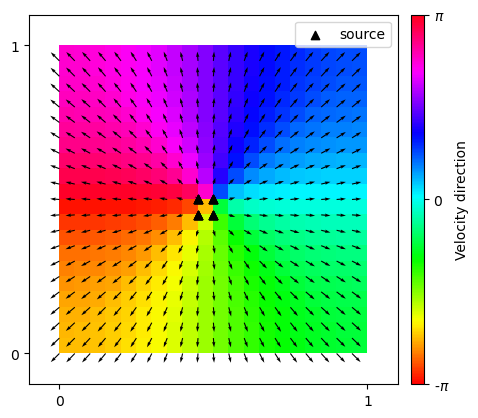

In [293]:
def generate_plane_wave_2period_snapshots(N_neurons):
    # 函数名: 意思是生成表示向右传播的平面波的两个snapshot, 包含两个cos周期
    # 输入:
    #   N_neurons: 神经元的数量
    # 输出:
    #   snapshot_1, snapshot_2: 时间上连续的两帧, 平面波往右移动了两格

    # 生成两个cos周期的相位行向量
    cos_phase_lefthalf = torch.linspace(-torch.pi, torch.pi, N_neurons//2+1, requires_grad=False)
    cos_phase_righthalf = torch.linspace(-torch.pi, torch.pi, N_neurons-N_neurons//2+1, requires_grad=False)
    cos_phase = torch.cat((cos_phase_lefthalf[:-1], cos_phase_righthalf[:-1]), dim=0)
    # y方向是均匀的
    snapshot_1 = torch.stack([cos_phase] * N_neurons, dim=0)
    plt.plot(np.linspace(0, 1, N_neurons), snapshot_1[0, :])
    # 平面波往右移动了两格
    snapshot_2 = torch.roll(snapshot_1, shifts=2, dims=1)
    plt.plot(np.linspace(0, 1, N_neurons), snapshot_2[0, :])

    plt.plot(np.linspace(0, 1, N_neurons), phase_difference(snapshot_2[0, :], snapshot_1[0, :]))

    return snapshot_1, snapshot_2



def generate_plane_wave_1period_snapshots(N_neurons):
    # 函数名: 意思是生成表示向右传播的平面波的两个snapshot, 包含一个cos周期
    # 输入:
    #   N_neurons: 神经元的数量
    # 输出:
    #   snapshot_1, snapshot_2: 时间上连续的两帧, 平面波往右移动了两格

    # 生成一个cos周期的相位行向量
    cos_phase = torch.linspace(-torch.pi, torch.pi, N_neurons+1, requires_grad=False)
    cos_phase = cos_phase[:-1]
    
    # y方向是均匀的
    snapshot_1 = torch.stack([cos_phase] * N_neurons, dim=0)
    plt.plot(np.linspace(0, 1, N_neurons), snapshot_1[0, :])
    # 平面波往右移动了两格
    snapshot_2 = torch.roll(snapshot_1, shifts=2, dims=1)
    plt.plot(np.linspace(0, 1, N_neurons), snapshot_2[0, :])

    plt.plot(np.linspace(0, 1, N_neurons), phase_difference(snapshot_2[0, :], snapshot_1[0, :]))

    return snapshot_1, snapshot_2



def generate_synchronous_snapshots(N_neurons):
    # 函数名: 意思是生成表示同步态的两个snapshot, 是全局同步振荡的两帧(处处相位相同, 两帧之间相位不同)
    # 输入:
    #   N_neurons: 神经元的数量
    # 输出:
    #   snapshot_1, snapshot_2: 时间上连续的两帧

    snapshot_1 = torch.ones((N_neurons, N_neurons), requires_grad=False)
    snapshot_2 = snapshot_1*1.2

    return snapshot_1, snapshot_2



def generate_half_synchronous_half_planewave(N_neurons):
    # 函数名: 意思是生成表示一半空间是平面波一般空间是同步态的两个snapshot
    # 输入:
    #   N_neurons: 神经元的数量
    # 输出:
    #   snapshot_1, snapshot_2: 时间上连续的两帧, 平面波往右移动了两格

    cos_phase_lefthalf_1 = torch.linspace(-torch.pi, torch.pi, N_neurons//2+1, requires_grad=False)
    synchronous_righthalf = torch.ones(N_neurons-N_neurons//2+1, requires_grad=False) * torch.pi
    phase_1 = torch.cat((cos_phase_lefthalf_1[:-1], synchronous_righthalf[:-1]), dim=0)
    # y方向是均匀的
    snapshot_1 = torch.stack([phase_1] * N_neurons, dim=0)
    # 平面波往右移动了两格
    cos_phase_lefthalf_2 = torch.roll(cos_phase_lefthalf_1, shifts=2, dims=0)
    phase_2 = torch.cat((cos_phase_lefthalf_2[:-1], synchronous_righthalf[:-1]*1.2), dim=0)
    snapshot_2 = torch.stack([phase_2] * N_neurons, dim=0)

    return snapshot_1, snapshot_2



def generate_synchronous_in_planewave(N_neurons):
    # 函数名: 意思是生成表示周围一圈是平面波, 中间是共振态的两个snapshot
    # 输入:
    #   N_neurons: 神经元的数量
    # 输出:
    #   snapshot_1, snapshot_2: 时间上连续的两帧, 平面波往右移动了两格

    snapshot_1 = torch.tensor([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
                               [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]])

    snapshot_1 = torch.tensor([[1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
                               [1.9, 2.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8]])
    
    return snapshot_1, snapshot_2



def generate_1source_snapshots(N_neurons):
    # 函数名: 意思是生成表示一个源的两个snapshot
    # 输入:
    #   N_neurons: 神经元的数量
    # 输出:
    #   snapshot_1, snapshot_2: 时间上连续的两帧

    # 不知道怎么生成这样的矩阵, 所以暂时这个测试只能用N_neurons=20
    snapshot_1 = torch.tensor([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                               [1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0],
                               [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])
    
    snapshot_2 = snapshot_1 - 0.1
    
    return snapshot_1, snapshot_2



def generate_2source_snapshots(N_neurons):
    # 函数名: 意思是生成表示两个源的两个snapshot
    # 输入:
    #   N_neurons: 神经元的数量
    # 输出:
    #   snapshot_1, snapshot_2: 时间上连续的两帧

    # 不知道怎么生成这样的矩阵, 所以暂时这个测试只能用N_neurons=20
    snapshot_1 = torch.tensor([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                               [1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0],
                               [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])
    
    snapshot_2 = snapshot_1 - 0.1
    
    return snapshot_1, snapshot_2



def generate_1sink_snapshots(N_neurons):
    # 函数名: 意思是生成表示一个汇的两个snapshot
    # 输入:
    #   N_neurons: 神经元的数量
    # 输出:
    #   snapshot_1, snapshot_2: 时间上连续的两帧

    # 不知道怎么生成这样的矩阵, 所以暂时这个测试只能用N_neurons=20
    snapshot_1 = torch.tensor([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                               [1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0],
                               [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])
    
    snapshot_2 = snapshot_1 + 0.1
    
    return snapshot_1, snapshot_2



def generate_2sink_snapshots(N_neurons):
    # 函数名: 意思是生成表示两个汇的两个snapshot
    # 输入:
    #   N_neurons: 神经元的数量
    # 输出:
    #   snapshot_1, snapshot_2: 时间上连续的两帧

    # 不知道怎么生成这样的矩阵, 所以暂时这个测试只能用N_neurons=20
    snapshot_1 = torch.tensor([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                               [1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.6, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0, 1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0],
                               [1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0],
                               [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])
    
    snapshot_2 = snapshot_1 + 0.1
    
    return snapshot_1, snapshot_2



def generate_spiralout_snapshots(N_neurons):
    # 函数名: 意思是生成表示旋进螺旋的两个snapshot
    # 输入:
    #   N_neurons: 神经元的数量
    # 输出:
    #   snapshot_1, snapshot_2: 时间上连续的两帧

    # 不知道怎么生成这样的矩阵, 所以暂时这个测试只能用N_neurons=5
    snapshot_1 = torch.tensor([[1.0, 0.25, 0.3, 0.35, 0.4],
                               [0.95, 0.55, 0.2, 0.25, 0.45],
                               [0.9, 0.5, 0.1, 0.3, 0.5],
                               [0.85, 0.45, 0.4, 0.35, 0.55],
                               [0.8, 0.75, 0.7, 0.65, 0.6]])
    
    snapshot_2 = snapshot_1 + 0.05
    
    return snapshot_1, snapshot_2



N_neurons = 20  # 一行200个神经元, 迭代次数1000, 需要2s
snapshot_1, snapshot_2 = generate_1source_snapshots(N_neurons)
#print(snapshot_1)
#print(snapshot_2)
delta_x = 1
delta_t = 1
# 迭代初始条件必须用全0条件, 因为这样可以在同步态的时候给出正确的解(同步态如果初始条件是均一的, 那会一直保持在初始条件不动)
vx_init = torch.ones((N_neurons, N_neurons))*0
vy_init = torch.ones((N_neurons, N_neurons))*0
alpha = 0.1
max_iterations = 1000
threshold = 0.5

fig, ax = plt.subplots()
set_xy_ticks(ax)
optical_flow_analysis = Optical_flow()
vx, vy = optical_flow_analysis.optical_flow_HS_phase(snapshot_1, snapshot_2, delta_x, delta_t, vx_init, vy_init, alpha, max_iterations)
print(torch.min(torch.sqrt(vx**2 + vy**2)))
plot_vector_field(ax, vx, vy)
plot_colored_direction(fig, ax, vx, vy)
find_and_plot_fixed_points(ax, vx, vy, delta_x, N_neurons, threshold)
plt.show()

